In [ ]:
!pip install pandas
!pip install rdkit
!pip install seaborn
!pip install shap

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [7]:
data = pd.read_csv("/content/SolubilityDataset.xls")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SMILES               9982 non-null   object 
 1   Solubility           9982 non-null   float64
 2   MolLogP              9982 non-null   float64
 3   MolMR                9982 non-null   float64
 4   HeavyAtomCount       9982 non-null   float64
 5   NumRotatableBonds    9982 non-null   float64
 6   NumValenceElectrons  9982 non-null   float64
 7   NumAromaticRings     9982 non-null   float64
 8   TPSA                 9982 non-null   float64
 9   LabuteASA            9982 non-null   float64
 10  BertzCT              9982 non-null   float64
dtypes: float64(10), object(1)
memory usage: 858.0+ KB


In [10]:
data = data.fillna(0)

In [ ]:
#Изменение размера графика
sns.set(rc={'figure.figsize':(15,12)})

<ipython-input-7-aef772926068>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


<Axes: >

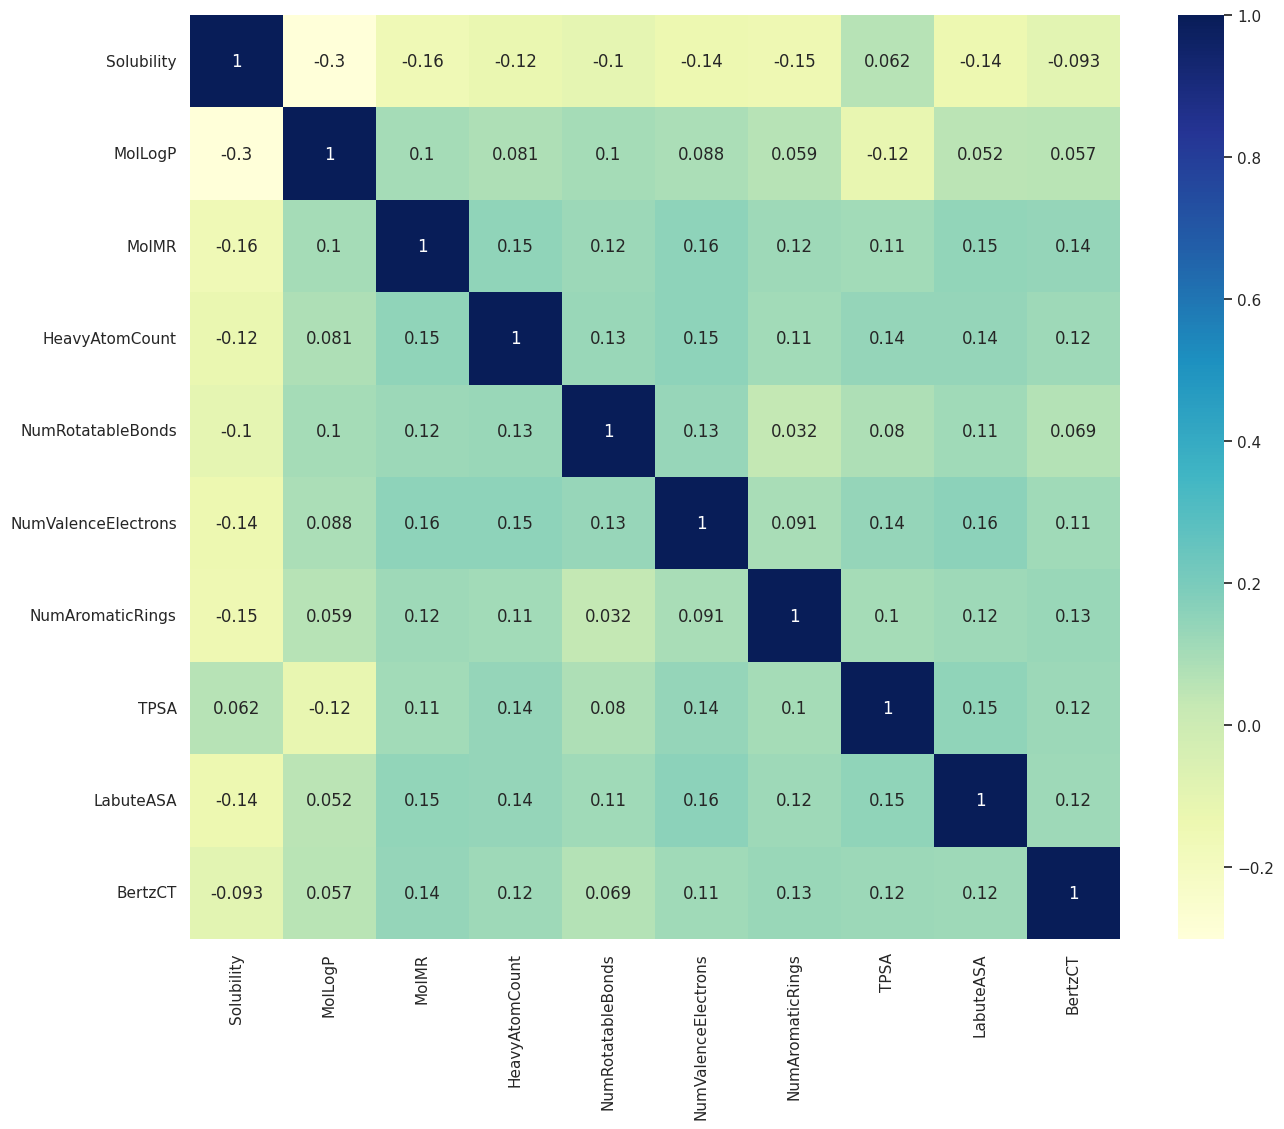

In [ ]:
#Матрица корреляции между дескрипторами
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

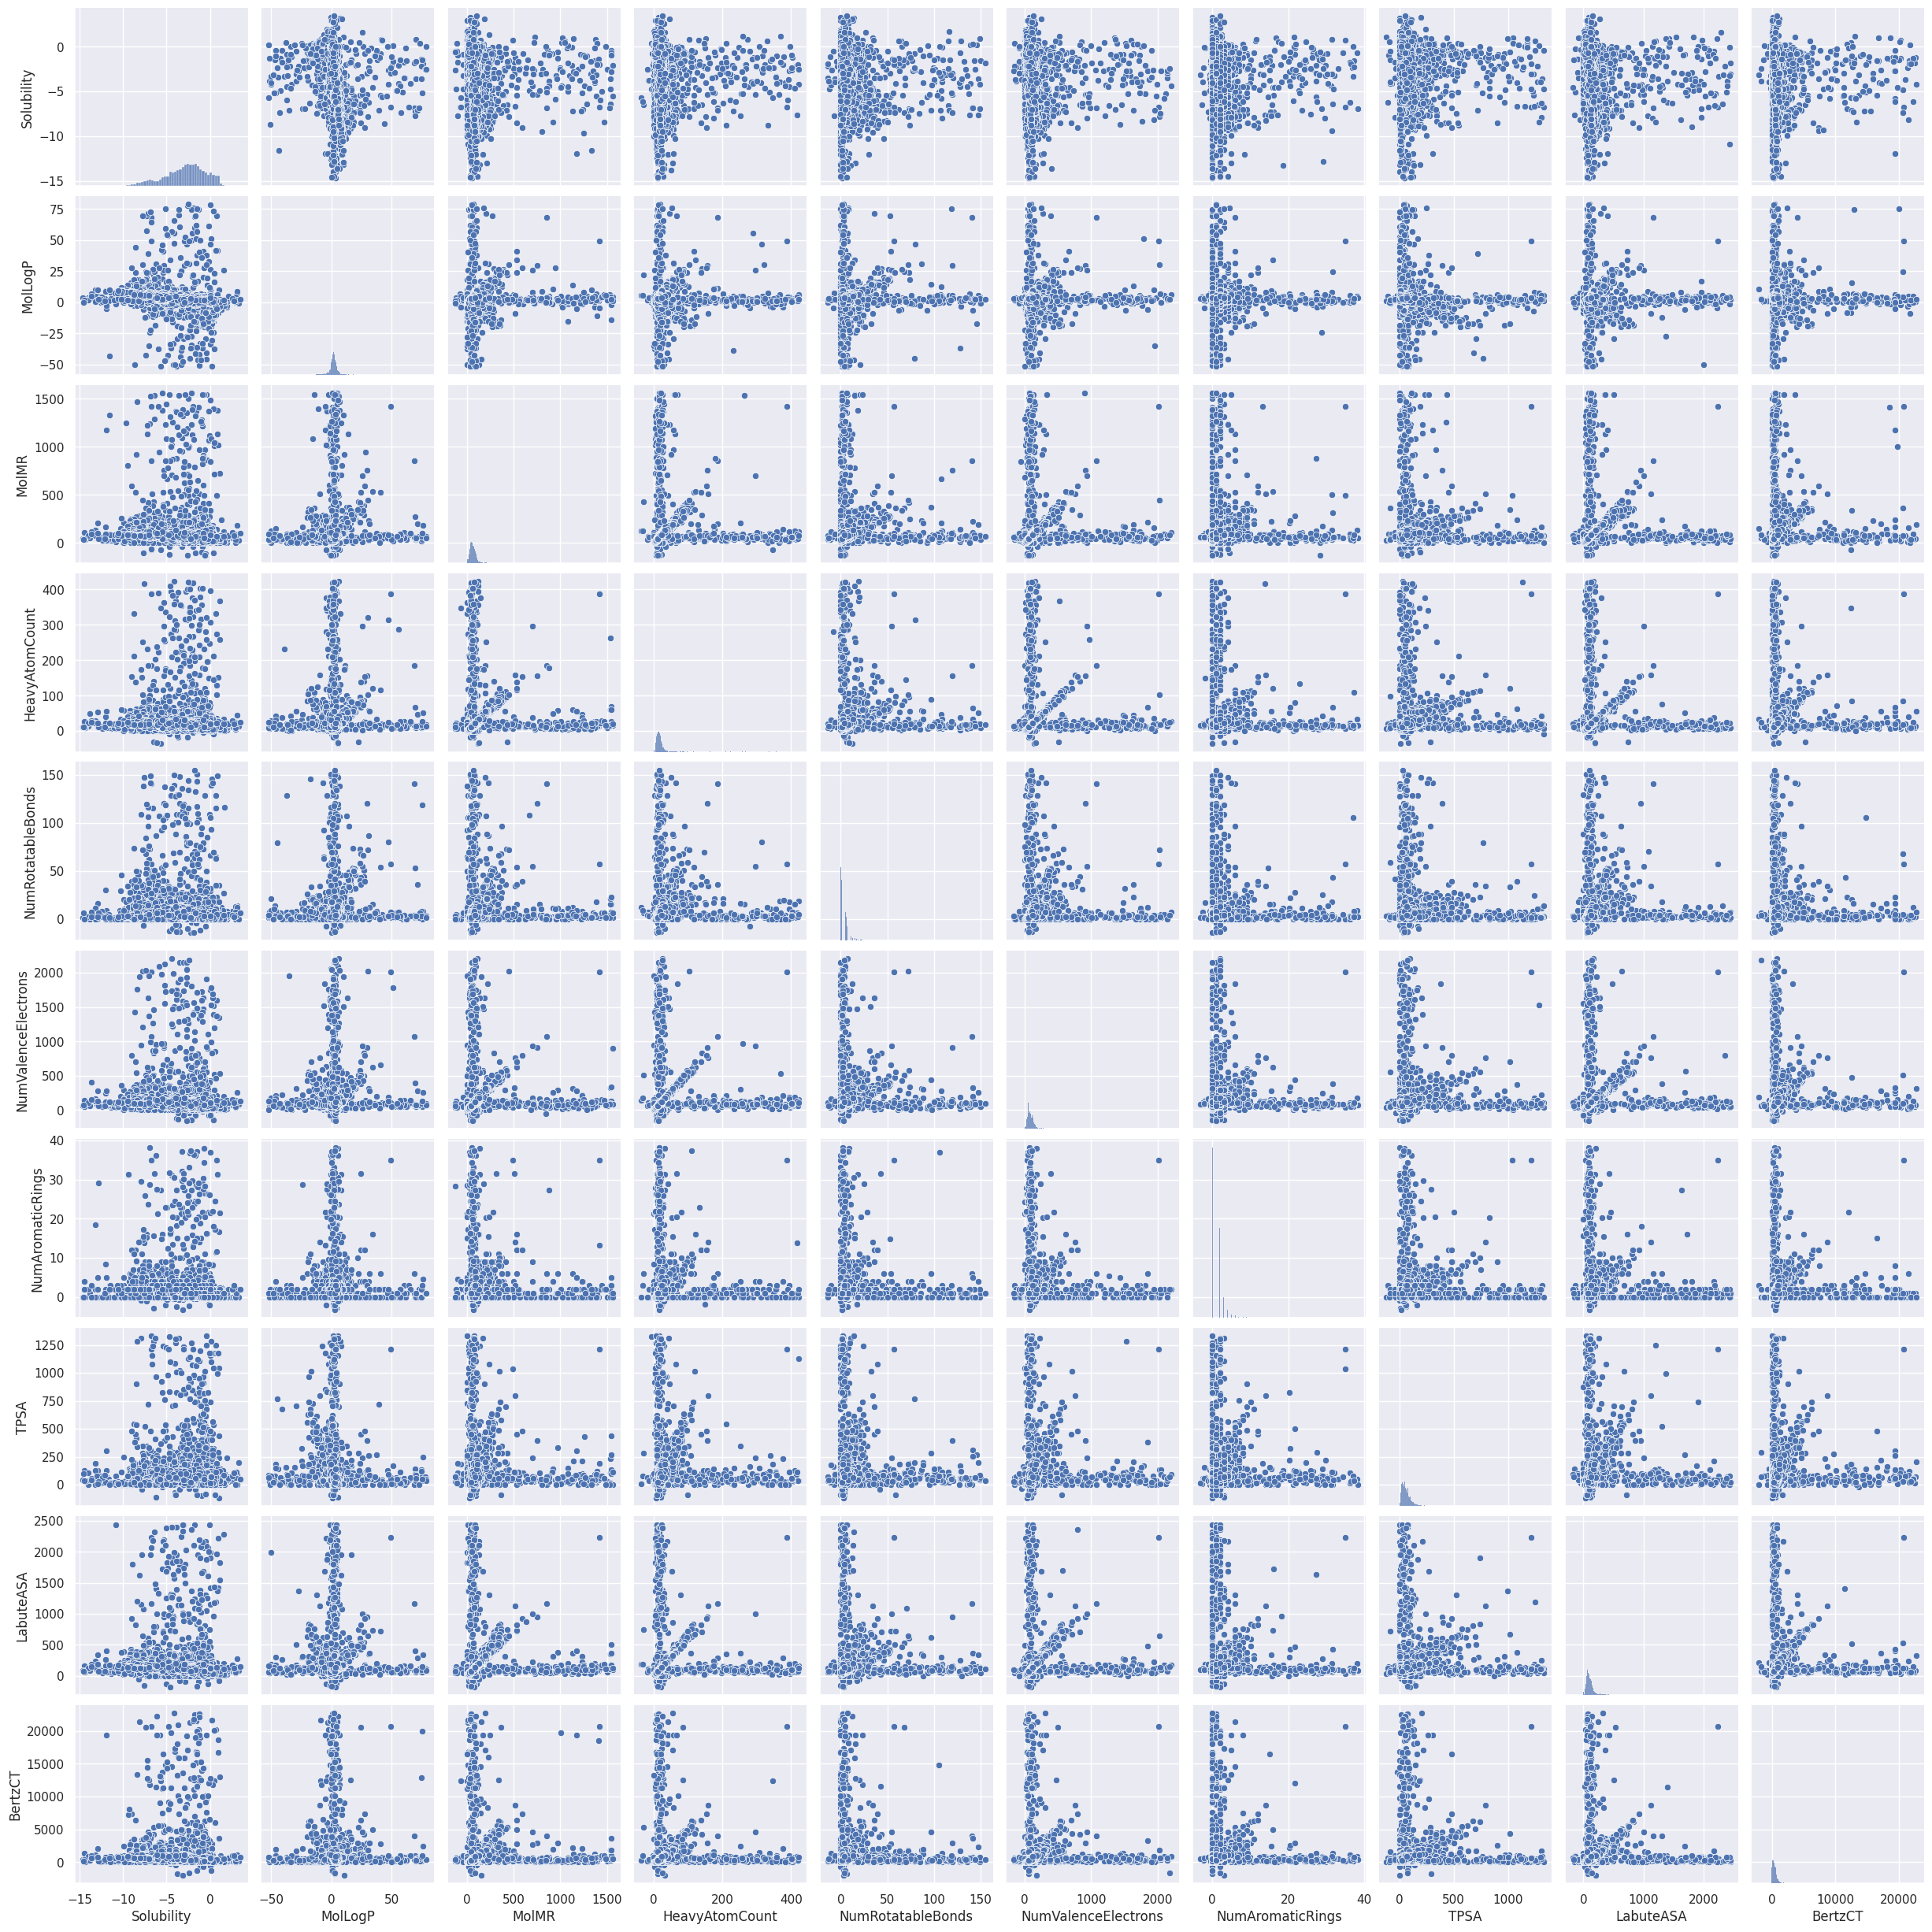

In [ ]:
sns.pairplot(data.drop(columns = ["SMILES"], axis = 1))

Пример добавление дескрипторов

In [ ]:
data["MolWt"] = pd.Series(np.array([Descriptors.MolWt(Chem.MolFromSmiles(i)) for i in data["SMILES"]]), index=data.index)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ["SMILES", "Solubility"],axis=1), data["Solubility"], test_size=0.3, random_state=42)

In [12]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [13]:
r2_score(y_test, model.predict(X_test))

0.5194072238354284

Здесь приведен пример простого кода для получения графика важности фичей


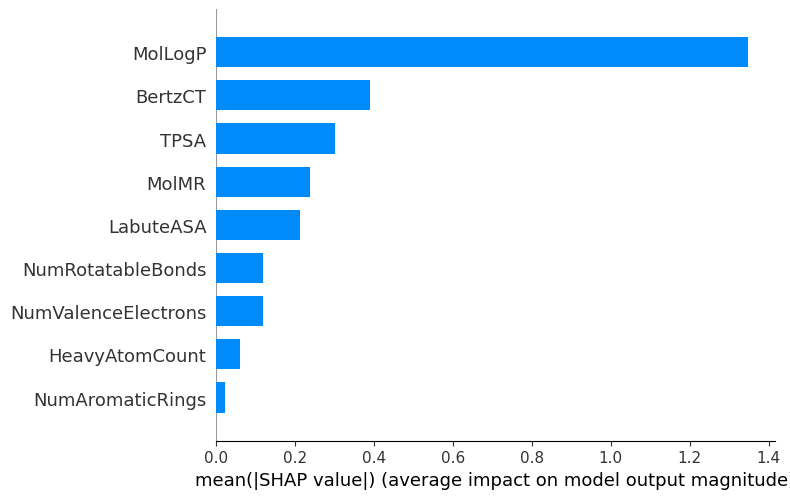

In [14]:

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')